In [1]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=15b51ec457989430d9399d454687bf676f56231708172e22c4dae18248966ba0
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


   # Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x,[2, 2.5, 3, 4.5])


   # Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid') # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')
defuzz_som
2.5

   # Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
            'max of maximum']
xvals = [defuzz_centroid,
           defuzz_bisector,
           defuzz_mom,
           defuzz_som,
           defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]
defuzz_som
2.5

2.5

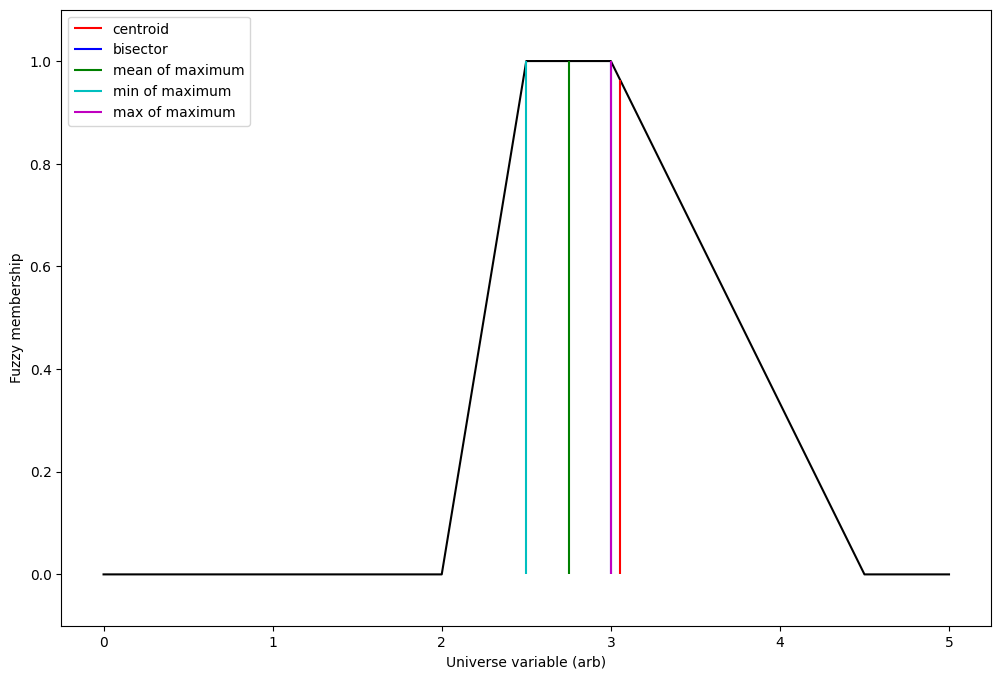

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()